In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
index= list(range(0,12))
df = pd.DataFrame(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
                  index = index,
                  columns = ['Mês']
                 )
df['Investimentos'] = [800,400,1100,400,500,750,1500,650,850,400,1000,720]
df.head(5)

Mês  Investimentos
0  Jan            800
1  Fev            400
2  Mar           1100
3  Abr            400
4  Mai            500

# Dados estáticos e dados dinâmicos

Definição :

Dados estáticos : <br>

São dados que não apresentam apresentao variação em relação ao tempo
Exemplo: Tabela de preço 

<br>

Dados dinâmicos são aqueles que apresentam alguma variação. <br>
Exemplo: Preços de um produto durante um periodo de tempo especifico, por exemplo, no anos de 2021

# Gráfico de barras

"Um gráfico de barras é uma forma de resumir um conjunto de dados categóricos. Ele mostra os dados utilizando um número de barras de mesma largura, cada uma delas representando uma categoria particular."

Texto retirado de : https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

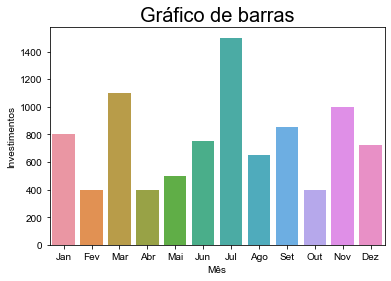

In [5]:
ax = sns.barplot(x = 'Mês', y ='Investimentos', data = df) 
ax.set_title('Gráfico de barras', fontsize=20)
sns.set(rc = {'figure.figsize':(20,10)})

Documentação do <i> barplot </i> seaborn : https://seaborn.pydata.org/generated/seaborn.barplot.html

# Gráfico de barras duplo

Para isso, criaremos um novo dataframe, e faremos uma compara

In [6]:
index= list(range(0,12))
df_teste = pd.DataFrame(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
                  index = index,
                  columns = ['Mês']
                 )
df_teste['Investimentos - 2020'] = [800,400,1100,400,500,750,1500,650,850,400,1000,720]
df_teste['Investimentos - 2021'] = [400,200,550,200,250,375,750,325,425,200,500,360]
df_teste.head(5)

Mês  Investimentos - 2020  Investimentos - 2021
0  Jan                   800                   400
1  Fev                   400                   200
2  Mar                  1100                   550
3  Abr                   400                   200
4  Mai                   500                   250

In [7]:
labels = list(df['Mês'])
x = np.arange(len(labels))
labels

['Jan',
 'Fev',
 'Mar',
 'Abr',
 'Mai',
 'Jun',
 'Jul',
 'Ago',
 'Set',
 'Out',
 'Nov',
 'Dez']

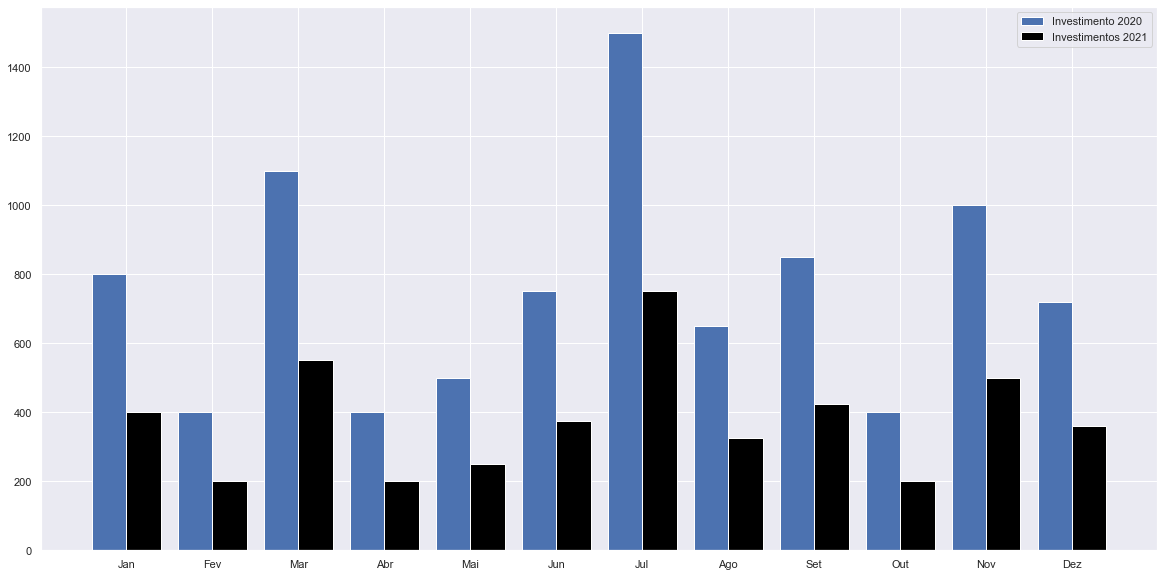

In [8]:
fig, ax = plt.subplots()
x_axis = np.arange(len(df['Mês'])) #transformando o index em números, de 0 a 11
ax.bar(x_axis - 0.2, height='Investimentos - 2020',  data = df_teste, width=0.4, label='Investimento 2020') #width diinui a larcura da barra, nessa, foi para que as duas coubesse
ax.bar(x_axis + 0.2, height='Investimentos - 2021',  data = df_teste, width=0.4, label='Investimentos 2021', color = 'black')
plt.xticks(x, labels)#Muda o note de cada uma das etiquetas para o eixo X
plt.legend()

Esse tipo de gráfico deve ser utilizado com cautela para nao ficar poluído demais.
Geralmente, usasse entre 2 a no máximo 3 gráfcos simultâneos

# Gráfico de barras horizontais

<BarContainer object of 12 artists>

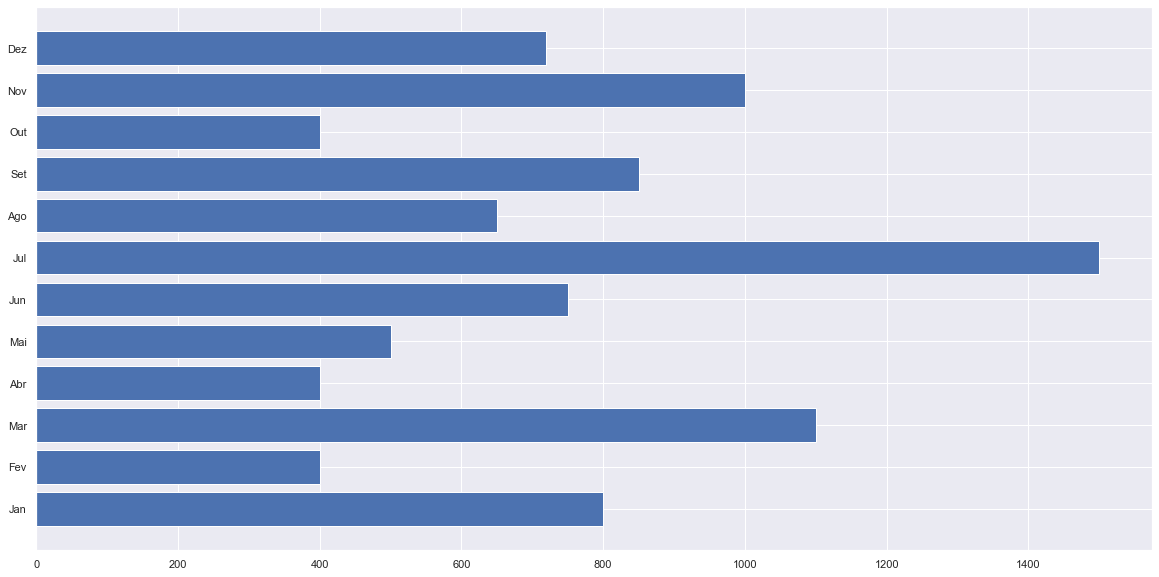

In [9]:
plt.barh(y = 'Mês', width = 'Investimentos', data = df)

O gráfico de barras horizontais facilita uma visualização mais natural, que é a visualização em Z, que será abordada mais a frente

# Gráfico da série temporal : Linha

" As métricas individuais são representadas como uma série de pontos de dados (também chamados de "marcadores") entre os dois eixos. "

Texto retirado de : https://support.google.com/datastudio/answer/7059697?hl=pt-BR#zippy=%2Cneste-artigo

<AxesSubplot:xlabel='Mês', ylabel='Investimentos'>

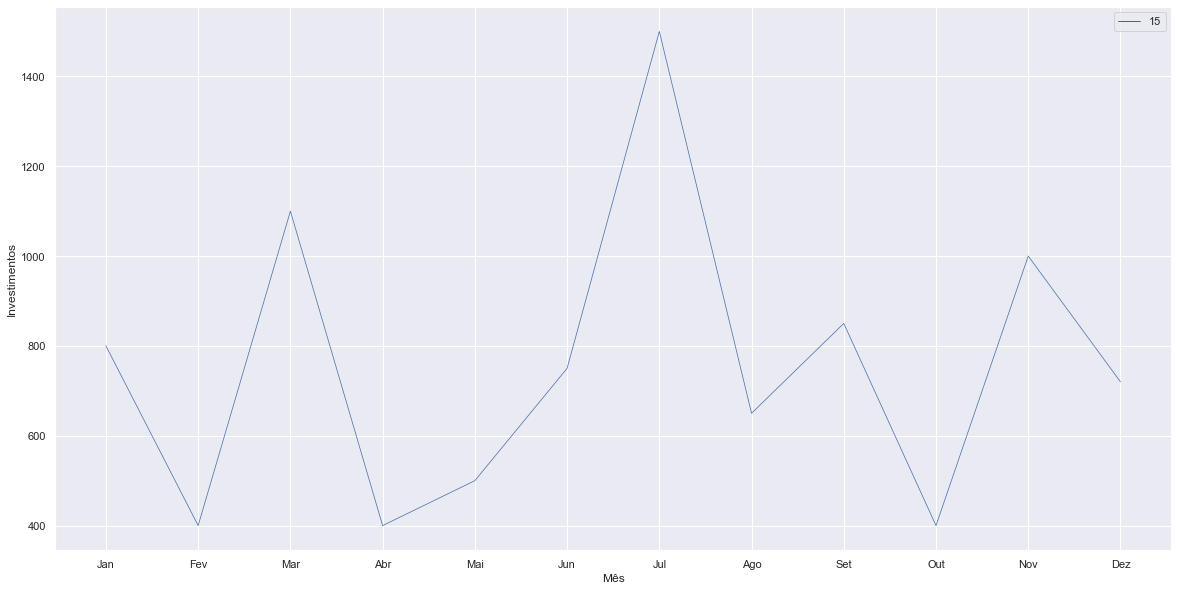

In [10]:
sns.lineplot(x = 'Mês', y ='Investimentos', data= df, size=15)

Documentação <i> Lineplot </i> seaborn : https://seaborn.pydata.org/generated/seaborn.lineplot.html

# Comparação entre gráfico de linha e de barra lado a lado

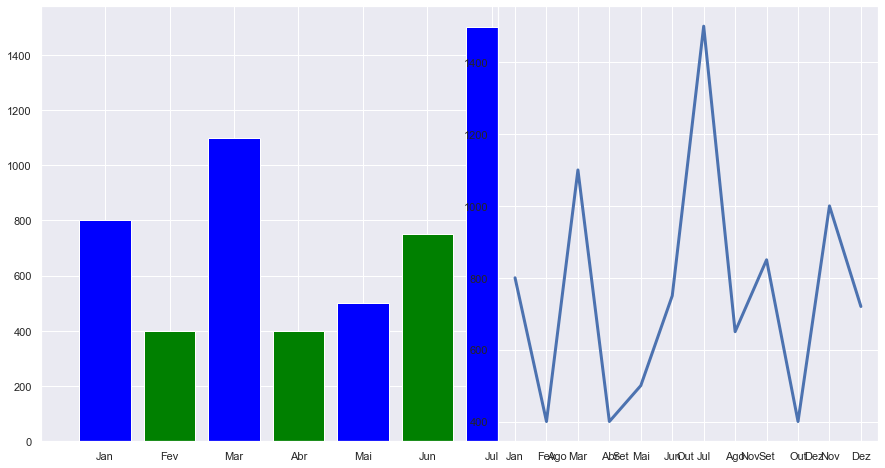

In [11]:
plt.rc('figure', figsize = (15,8))
area = plt.figure()
g1 = area.add_subplot(1, 1, 1) #entre parenteses está, respectivamente, o numero de linhas, colunas e a posição da figura 
g2 = area.add_subplot(1, 2, 2)

g1.bar(x = 'Mês', height ='Investimentos', data= df, color=['blue','green'])
g2.plot(df['Mês'],df['Investimentos'], linewidth = 3)

# Interposição entre gráfico de barra e de linha

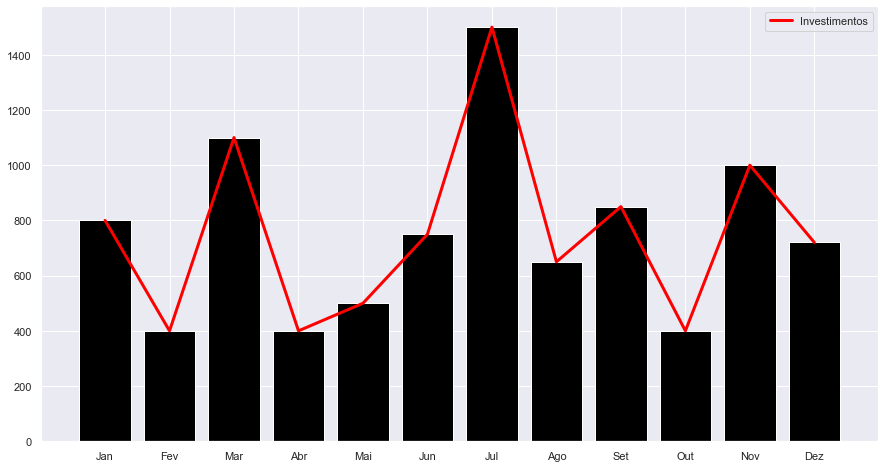

In [12]:
plt.bar(x = 'Mês', height ='Investimentos', data= df, color='black')
plt.plot(df['Mês'],df['Investimentos'], color='red', linewidth = 3, label='Investimentos')
plt.legend()

Se observarmos, vemos que o gráfico de linhas exibe o historico de gráfico de barras, seguindo a mesma tendencia

Vale lembra que, quando falamos em visualização de dados, devemos ter em, qual mensagem queremos passar. <br></br>
Considerando o gráfico anterior, por exemplo, poderíamos tentar evidencia que, de abril para julho, o lucro dos investimentos triplicou

Text(Jul, 1500, '1500')

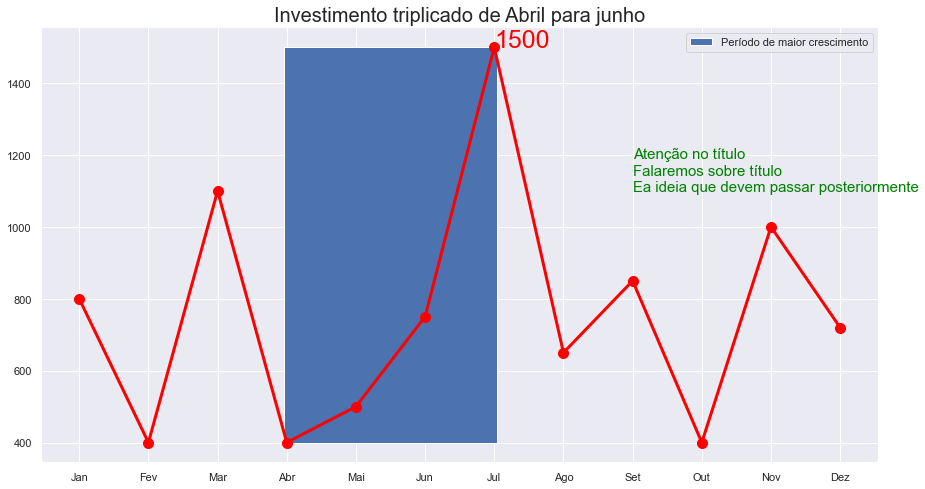

In [13]:
ax = plt.subplot()
ax.plot(df['Mês'],df['Investimentos'], color='red', 
        linewidth = 3, 
        marker = 'o', # define o stylo dos pacadores 
        ms= 10)  #tamanho dos marcadores
ax.axhspan(df['Investimentos'].min(), df['Investimentos'].max(), 0.29, 0.545, label='Período de maior crescimento') 
#label: defina um nome para esse elemento

ax.set_title('Investimento triplicado de Abril para junho', size=20)
ax.legend() #exibe as legendas com os nomes previamene atribuidos para cada elemento

ax.annotate('Atenção no título \nFalaremos sobre título \nEa ideia que devem passar posteriormente',
            (df['Mês'][8], df['Investimentos'][2]), size=15, c='green')

ax.annotate('1500', (df['Mês'][6], df['Investimentos'].max()), size=25, c='red')

Sobre os markers possíveis : https://matplotlib.org/stable/api/markers_api.html

O título do gráfico também é considerado um ponto importantíssimo, pois ele pode orientar quem visualizar a focar em alguma informação que você queira passar no gráfico

Text(0.5, 1.0, 'Valores dos Investimentos durante o ano')

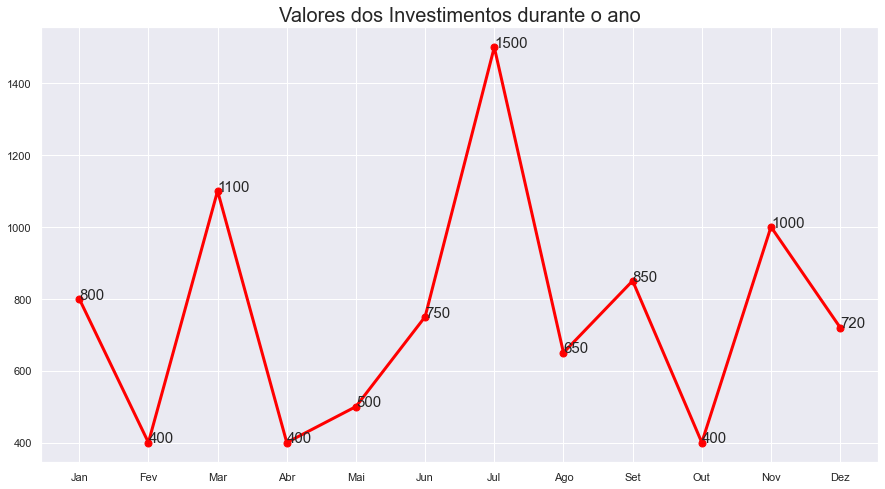

In [14]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Investimentos'], 
         color='red', 
         linewidth = 3, 
         label='Investimentos',
         marker='o',
         ms=7
        )

for i, txt in enumerate(df['Investimentos']):
    ax.annotate(txt, (df['Mês'][i], df['Investimentos'][i]), size=15)
    

# a função annotate serve para fazer todo tipo de anotação nos gráfico
#Na função acima, usei para enumerar os pontos, utilizando as coordenadas para X e Y os proprios valores de Mes e Investimentos


ax.set_title('Valores dos Investimentos durante o ano', size=20) #Aqui a parte importante sobre o tópico

Acima, vemos que destacamos cada ponto com os seus devidos valores.
Portanto, o título justamente destaca a ideia que queria ser passada nesse gráfico. de informar nos valores.
Porém, se tirarmos o gráfico de contexto, poderíamos averiguar que os valores fornecidos podem não fazer sentdio.
Pois não estamos dizendo a unidade de medida (por exemplo, o valor 800, alguém poderia interprestar como 800 reais ou até mais 800 mil reais, dependendo do contexto poderia até ser entendido que não se trata de valores em di heiro, e sim, investimentos em "quantidade de maçãs" talvez, por isso devemmos evidenciar no titulo a aunidade de medida)

Text(0.5, 1.0, 'Valores ( Em R$) dos Investimentos durante o ano')

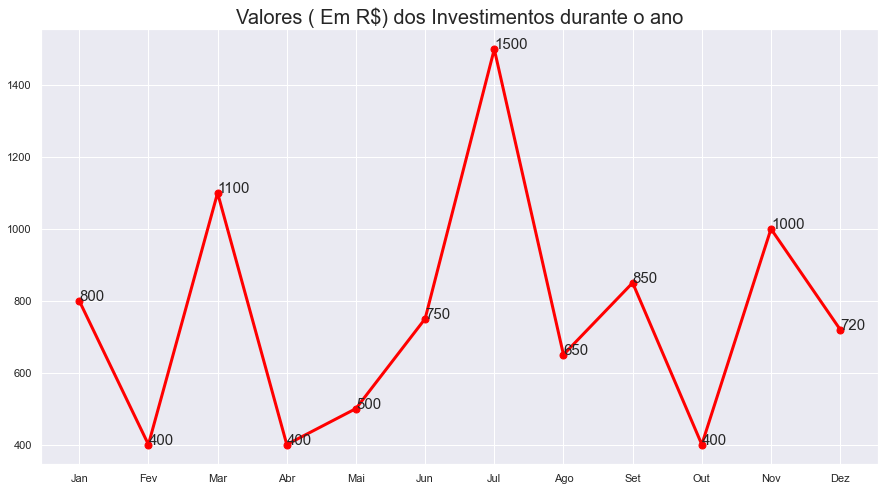

In [15]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Investimentos'], 
         color='red', 
         linewidth = 3, 
         label='Investimentos',
         marker='o',
         ms=7
        )

for i, txt in enumerate(df['Investimentos']):
    ax.annotate(txt, (df['Mês'][i], df['Investimentos'][i]), size=15)
    

# a função annotate serve para fazer todo tipo de anotação nos gráfico
#Na função acima, usei para enumerar os pontos, utilizando as coordenadas para X e Y os proprios valores de Mes e Investimentos


ax.set_title('Valores ( Em R$) dos Investimentos durante o ano', size=20) #Aqui a parte importante sobre o tópico

Um conceito muito utilizado quando o assunto é visualização de dados, é o conceito de visualização em <b>Z</b>, que sgnifica "zigue zague" , que a maneira mais comun e natural de visualizar as coisas, faendo com que você olhe de um canto ao outro.
Os Elementos de um gráfico geralmente são posicionados de forma que cause o efeito de zigue-zague durante e a primeira visualização, no entanto, também existem outraos padrões de visuailização, como o <b>F</b> 

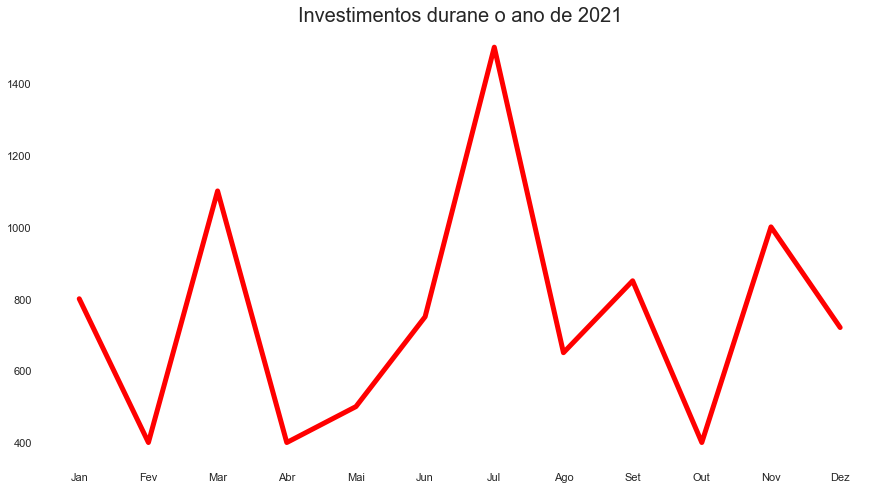

In [16]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Investimentos'], 
         color='red', 
         linewidth = 5, 
         ms=7,
        )

ax.set_title('Investimentos durane o ano de 2021', size=20)
ax.set_facecolor('white') #troca o fundo, 'white' para trocou para branco

Já o título acima, fará com que o visualizador tenha mais atenção na performance <br>
Perceba também que não incluimos os valores, pois nao era o foco do gráfico <br>
O fundo tambem foi trocado para uma melhor visualização

## <strong> Multiplos investidores </strong>
Agora, iremos adcionar investidores simultâneos

In [17]:
df.rename(columns={'Investimentos':'Ana'}, inplace = True)
df['Joao'] = [800,400,-1100,-400,-500,-750,-1500,-650,-850,-400,-1000,-720]
df['Camila'] = [800,400,-55,20,-25,37.5,-75,32.5,-42.5,20,-50,36]

In [18]:
df

Mês   Ana  Joao  Camila
0   Jan   800   800   800.0
1   Fev   400   400   400.0
2   Mar  1100 -1100   -55.0
3   Abr   400  -400    20.0
4   Mai   500  -500   -25.0
5   Jun   750  -750    37.5
6   Jul  1500 -1500   -75.0
7   Ago   650  -650    32.5
8   Set   850  -850   -42.5
9   Out   400  -400    20.0
10  Nov  1000 -1000   -50.0
11  Dez   720  -720    36.0

## <font color='blue'> Gráfico da ana </font>

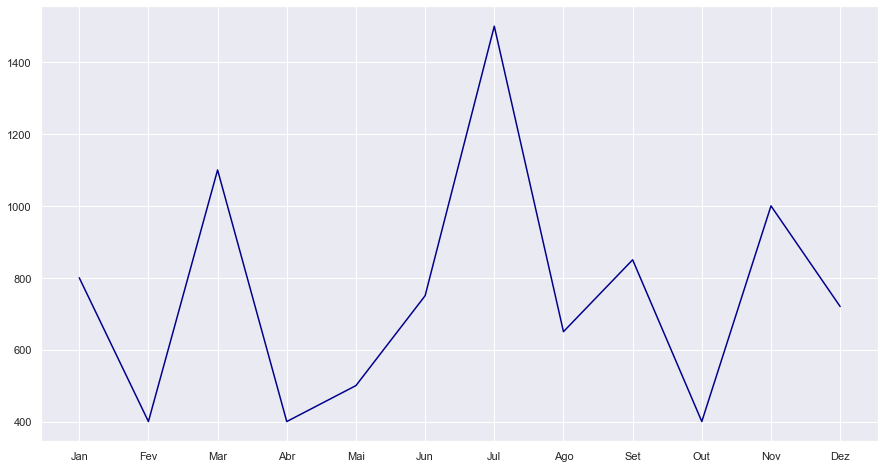

In [19]:
plt.plot( df['Mês'], df['Ana'], label = 'Ana', c='darkblue')

## <font color='Red'> Grafico do joão </font>

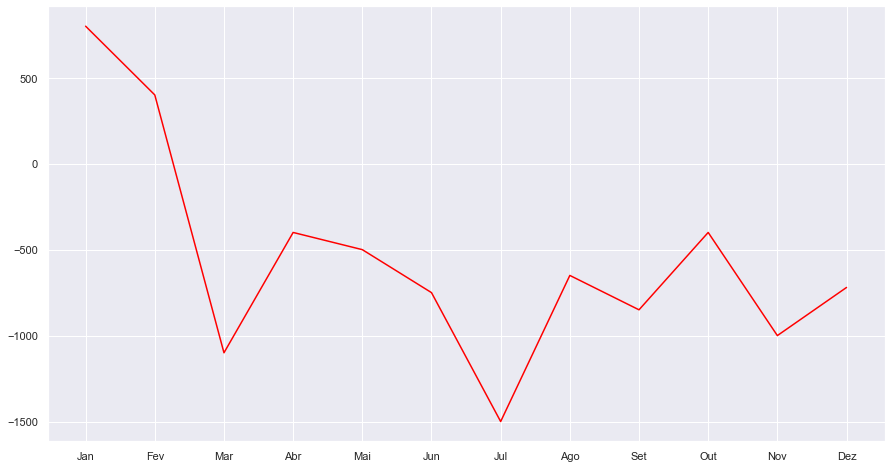

In [20]:
plt.plot(df['Mês'],df['Joao'], label = 'Joao', c='red')

 ## <font color='yellow'> Gráfico da camila </font>

Text(0.5, 1.0, 'Investimentos da camila (predominantemente negativo)')

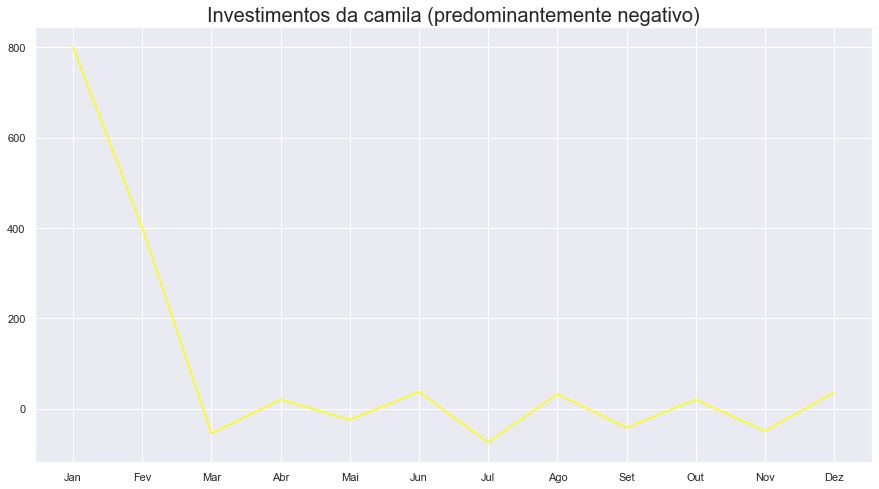

In [21]:
ax = plt.subplot()
ax.plot(df['Mês'],df['Camila'], label = 'Camila', c='yellow' )
ax.set_title('Investimentos da camila (predominantemente negativo)', size=20)

## Correlação entre os gráficos da Ana, Joao e Camila

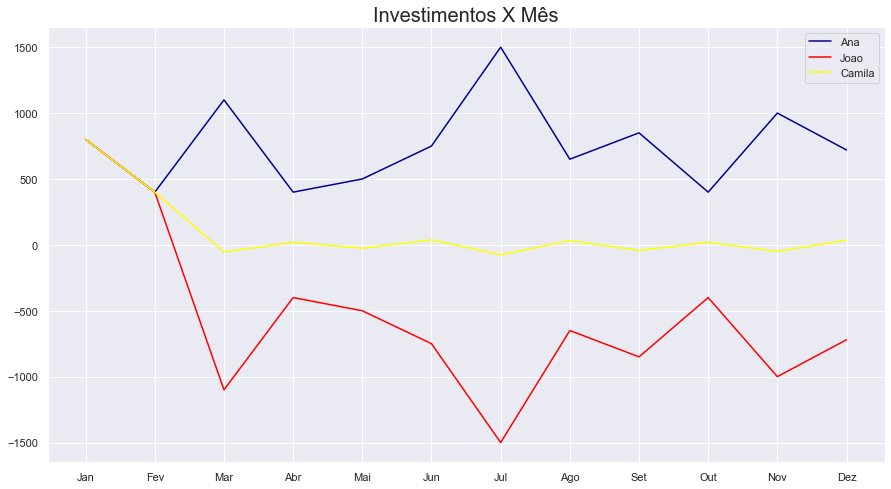

In [22]:
ax = plt.subplot()
ax.plot(df['Mês'],df['Ana'], label = 'Ana', c='darkblue')
ax.plot(df['Joao'], label = 'Joao', c='red')
ax.plot(df['Camila'], label = 'Camila', c='yellow' )

ax.set_title('Investimentos X Mês', size=20)
ax.legend()

# Gráfico de linhas - Empilhado

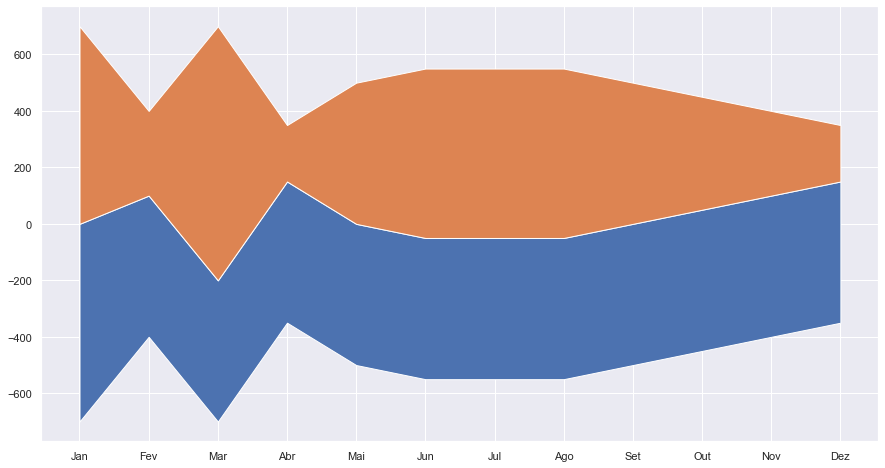

In [27]:
#utilizando primeiramente valores diferentes do que temos, para uma melhor visualização desse tipo de gráfico
fig, ax = plt.subplots()
ax.stackplot(df['Mês'], [700,500,500,500,500,500,500,500,500,500,500,500], 
              [700,300,900,200,500,600,600,600,500,400,300,200],
             baseline='sym' #opção para "symetric"
             )

Percebemos de forma mais clara, como se fosse somente uma unidade, o comportamento dos nossos gráficos quando os empilhamos em uma única figura

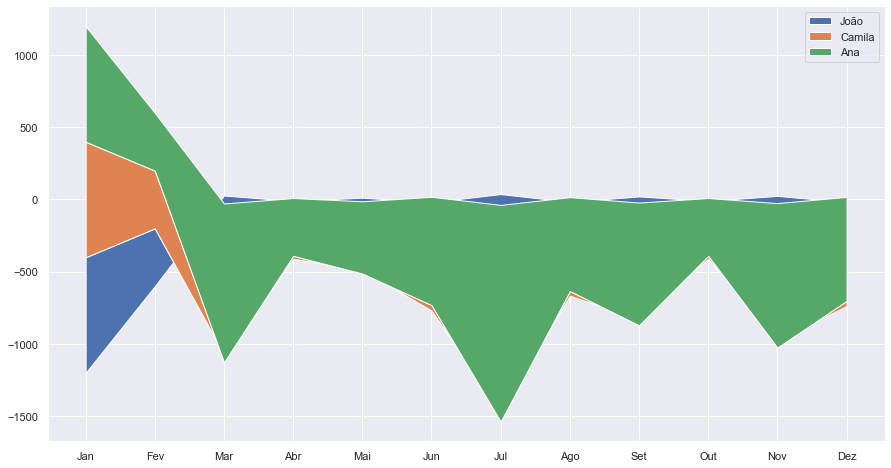

In [36]:
#Agora utilizando nos dados
plt.stackplot(df['Mês'], df['Joao'] , df['Camila'], df['Ana'],baseline='sym',labels=['João', 'Camila', 'Ana'],
             )
plt.legend()

# Gráfico de Radar

O gráfico de radar é pouco utilizado, portanto, irei abordar brevemente esse tópico 

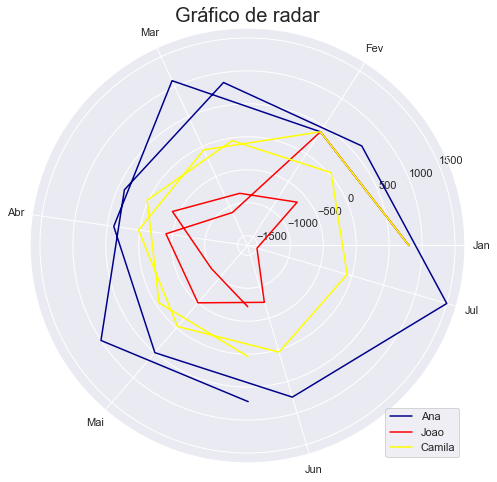

In [43]:
ax = plt.subplot(polar=True)
ax.plot(df['Mês'],df['Ana'], label = 'Ana', c='darkblue')
ax.plot(df['Joao'], label = 'Joao', c='red')
ax.plot(df['Camila'], label = 'Camila', c='yellow' )
ax.set_title('Gráfico de radar', size=20)
plt.legend(loc='lower right')

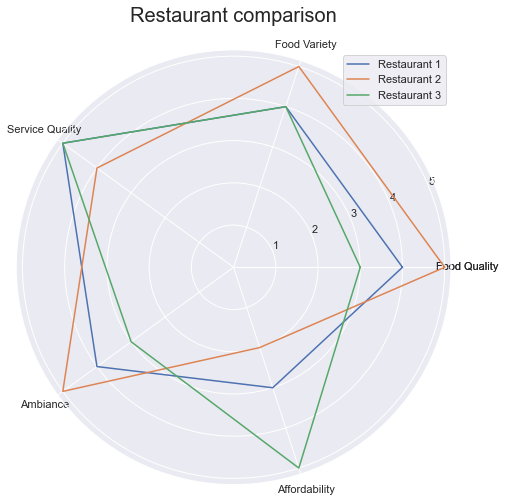

In [48]:

categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1')
plt.plot(label_loc, restaurant_2, label='Restaurant 2')
plt.plot(label_loc, restaurant_3, label='Restaurant 3')
plt.title('Restaurant comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

## Agora com um grafico de linha ja usado anteriormente, para facilitar a visualização

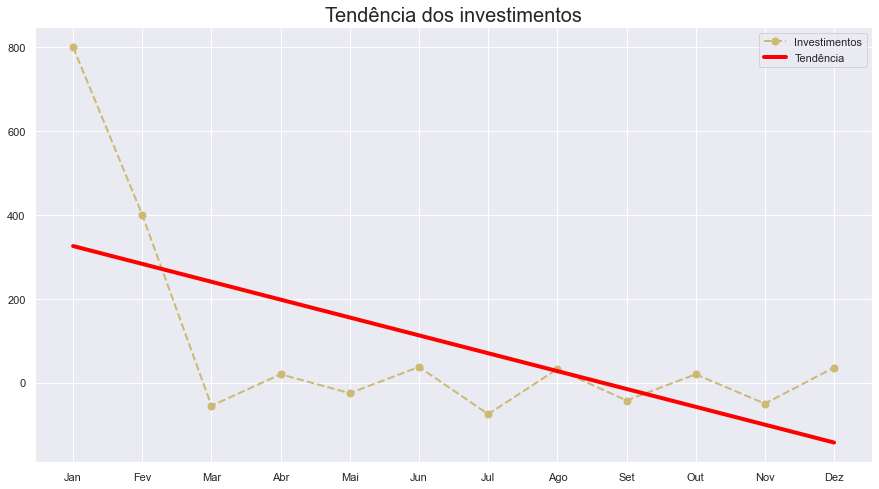

In [22]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Camila'], 
         'y--',  #Aqui, em uma unica vez, definimos a cor com "y" e o estilo da linha com "---"
         linewidth = 2, #mininuimos a grossura da linha para menor visbilidade
         label='Investimentos',
         marker='o',
         ms=7
       )
z = np.polyfit(lista, df['Camila'], 1)
p = np.poly1d(z)
plt.plot(lista,p(lista),c='red', label= 'Tendência', linewidth= 4)
ax.set_title('Tendência dos investimentos', size=20)
ax.legend()

Aqui tentamos melhorar e dar mais enfâse para o gráfico de tendência, pois essa é informação que queremos evidenciar.
Perceba que dei uma cor mais forte a linha que indica a tend~encia, para enfatizar essa informação.
Perceba o quanto isso  sentido quando eu inverto as cores, conforme mostrado no gráfico abaixo.

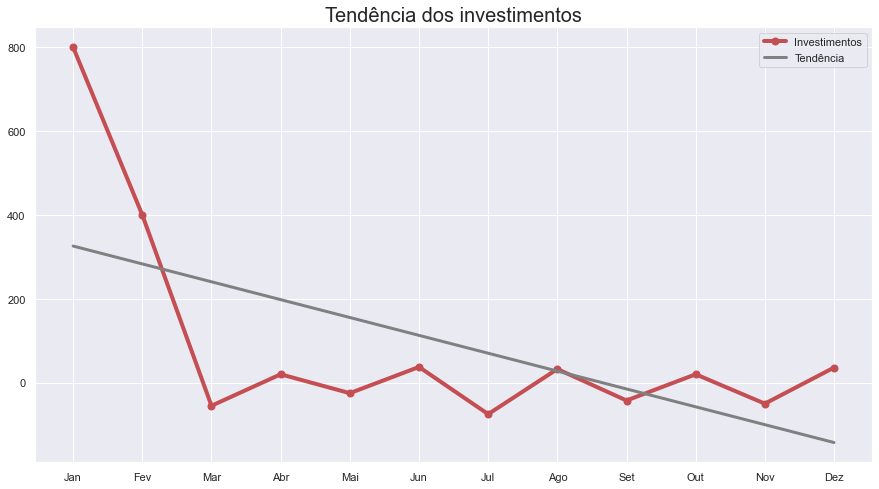

In [23]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Camila'], 
         'r', 
         linewidth = 4,
         label='Investimentos',
         marker='o',
         ms=7
       )
z = np.polyfit(lista, df['Camila'], 1)
p = np.poly1d(z)
plt.plot(lista,p(lista),c='gray', label= 'Tendência', linewidth= 3)
ax.set_title('Tendência dos investimentos', size=20)
ax.legend()

Perceba como a linha de tendência perdeu enfâse após esa alteração de cores.
Ela ainda está lá, mas quase invisível e nao chama a atenção

### Ressaltando o ponto da legenda

Perceba que etiquetei cada elemento do nosso gráfico com a legenda com seu respectivo significado.
Um ponto simples do gráfico, porém, sua relevância é notória

## Para dar ainda mais ênfase na tendência

Conforme vimos no gráfico acima, a a linha para abaixo indica uma tendência de queda.
Nesse caso, seria interessantes aplicarmos algumas informações de estatítica para enfatizar os resultados da Camila.
Iremos acrescentar a informação do percentua de número positivos

In [24]:
(df[['Camila']] > 0).value_counts(normalize = True) * 100
#Foi feito uma seleção dos dados com uma condição, que fossem maior do que 0
#No caso, os dados foram separados em um conjunto de dois elementos, True e False
#True para elementos maior que 0, e False, para elementos menor do que 0
# a função value counts do pandas a quantidade de elementos, no caso, contou os True e Falses
# o paramentro "normalize" transforma em %
#No caso, apenas foi necessário multiplicar por 100 para uma melhor entendimento da porcentagem

Camila
True      58.333333
False     41.666667
dtype: float64

Acima, foi descoberto que, a porcentagem de valores positivos de camila foi de 58%, ou seja, pouco mais da metade apenas

Iremos inserir a porcentagem acima, no gráfico, a fim de enfatizar a tendência de queda

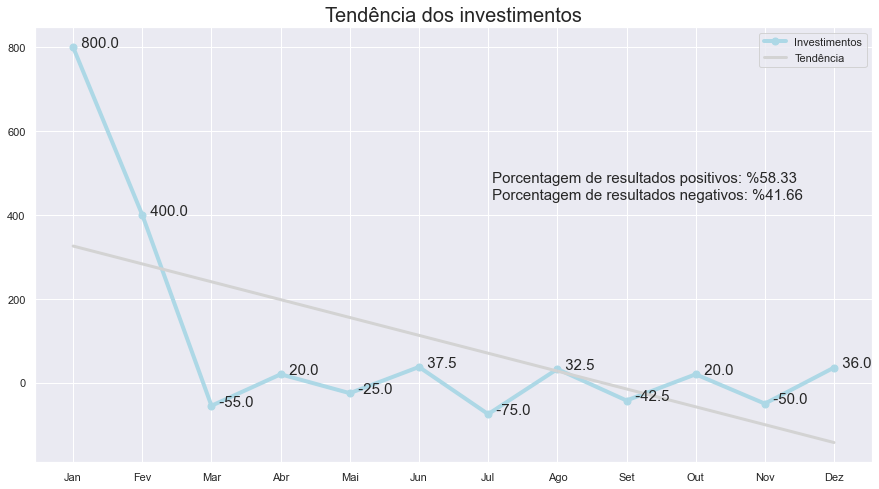

In [25]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Camila'], 
         c='lightblue', 
         linewidth = 4,
         label='Investimentos',
         marker='o',
         ms=7
       )
z = np.polyfit(lista, df['Camila'], 1)
p = np.poly1d(z)
plt.plot(lista,p(lista),c='lightgray', label= 'Tendência', linewidth= 3)
ax.set_title('Tendência dos investimentos', size=20)
ax.annotate(''' Porcentagem de resultados positivos: %58.33
 Porcentagem de resultados negativos: %41.66
''', 
(6, 400), size = 15)

for i, txt in enumerate(df['Camila']):
    ax.annotate(f'  {txt}', (df['Mês'][i], df['Camila'][i]), size = 15)
    
ax.legend()

#As cores foram mudadas unicamente para enfatizer os valores mostrados a fim de evidenciar os valores negativos e positivos

Agora passaremos a informação do lucro real, somando os valores negativos e positivos, a fim de evidenciar de quanto foi o lucro da Camila

In [26]:
somatorio_Camila = df['Camila'].sum()
somatorio_Camila

1098.5

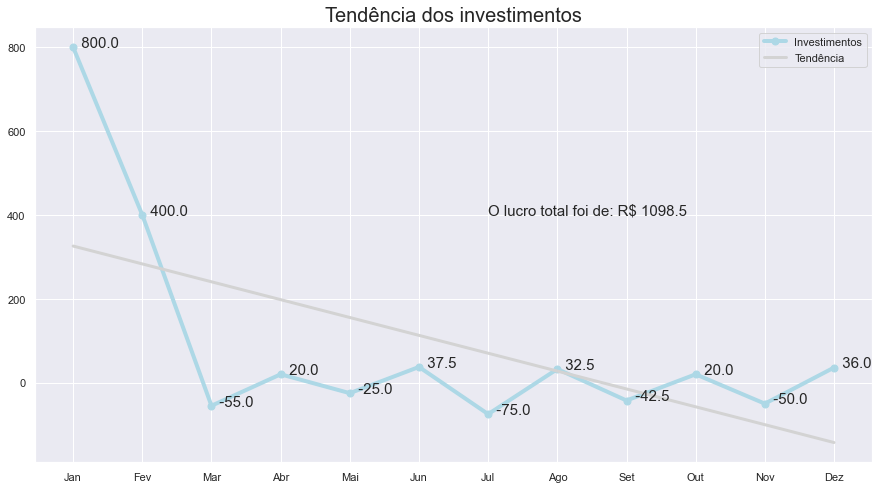

In [27]:
fig, ax = plt.subplots()
ax.plot(df['Mês'],df['Camila'], 
         c='lightblue', 
         linewidth = 4,
         label='Investimentos',
         marker='o',
         ms=7
       )
z = np.polyfit(lista, df['Camila'], 1)
p = np.poly1d(z)
plt.plot(lista,p(lista),c='lightgray', label= 'Tendência', linewidth= 3)
ax.set_title('Tendência dos investimentos', size=20)
ax.annotate(f'O lucro total foi de: R$ {somatorio_Camila}', 
(6, 400), size = 15)

for i, txt in enumerate(df['Camila']):
    ax.annotate(f'  {txt}', (df['Mês'][i], df['Camila'][i]), size = 15)
    
ax.legend()

#As cores foram mudadas unicamente para enfatizer os valores mostrados a fim de evidenciar os valores negativos e positivos

Perceba que, ao evidenciarmos somente o lucro, perde-se a ideia de que a tendência está inclinada negativamente, e da a entender que camila teve um bom desempenho, apesar dos altos e baixos.

Por isso, devemos nos atentar ao inserir informações no gráfico, e ter atenção em qual informação desejamos passar.

In [28]:
df[['Camila']].describe().round(2)

Camila
count   12.00
mean    91.54
std    255.41
min    -75.00
25%    -44.38
50%     20.00
75%     36.38
max    800.00

Um dos motivos principais pelo qual se faz necessário uma visialuzação gráfica dos dados, é que, indicadores estatísticos as vezes podem passar a ideia errada.
Conforme vimos na descrição acima, camila parece istar indo razoavelmente bem em seus investimentos, mas pode evidencia o quanto ela foi mal nos útimos meses, e o quanto ela tende a continuar caindo

# Trabalhando com um novo dataSet

In [29]:
df = pd.DataFrame(['Comédia', 'Aventura', 'Ação', 'Drama', 'Romance', 'Terror', 'Suspense'], columns = ['Categoria'])
df['Espectadores'] = [654,153,887,783,879,953,1430]
df

Categoria  Espectadores
0   Comédia           654
1  Aventura           153
2      Ação           887
3     Drama           783
4   Romance           879
5    Terror           953
6  Suspense          1430

Perceba que as informação são quantitativas, e não representam uma alternancia com base no tempo, como nos exemplos anteriores, portanto, um gráfico de linha não faria sentido

Poderímos utilizar um gráfico que represente, considerando o todo, a porcentagem que cada categoria representa

Apesar de não ser muito recomentado, o gráfico de pizza se enquadra perfeitamente nessa situação, pois ira evidenciar o quanto cada categoria representa do todo

([<matplotlib.patches.Wedge at 0x1d9d38b9e20>,
 [Text(1.030256788749378, 0.38544902287568367, 'Comédia'),
  Text(0.7665606520404186, 0.7889136624139352, 'Aventura'),
  Text(0.22039130501067397, 1.077695538023468, 'Ação'),
  Text(-0.7190634549782655, 0.8324348309115377, 'Drama'),
  Text(-1.0985440407888758, -0.05657729621719985, 'Romance'),
  Text(-0.5432069700828129, -0.9565177403757078, 'Terror'),
  Text(0.7798372377052709, -0.7757924224225274, 'Suspense')],
 [Text(0.5619582484087516, 0.2102449215685547, '11.4%'),
  Text(0.4181239920220464, 0.4303165431348737, '2.7%'),
  Text(0.12021343909673124, 0.5878339298309825, '15.5%'),
  Text(-0.39221642998814477, 0.4540553623153841, '13.6%'),
  Text(-0.5992058404302959, -0.030860343391199915, '15.3%'),
  Text(-0.2962947109542616, -0.5217369492958406, '16.6%'),
  Text(0.4253657660210568, -0.42315950313956036, '24.9%')])

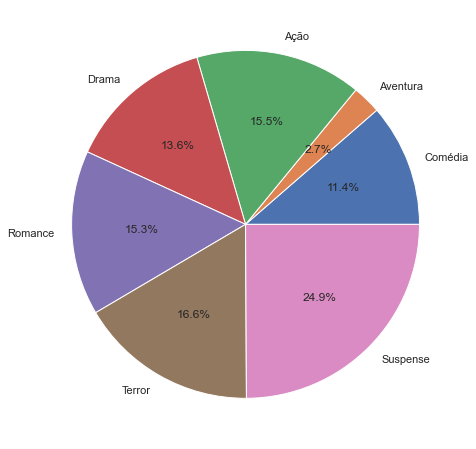

In [30]:
plt.pie(x = 'Espectadores', labels = 'Categoria', data=df, autopct='%1.1f%%')

Tambem poderíamos mudar as cores de cada parte do gráfico, para enfatizar os que são maior, médios e menores em questão de quantidade de espectadores, em relação ao total

([<matplotlib.patches.Wedge at 0x1d9d3669d00>,
 [Text(1.030256788749378, 0.38544902287568367, 'Comédia'),
  Text(0.7665606520404186, 0.7889136624139352, 'Aventura'),
  Text(0.22039130501067397, 1.077695538023468, 'Ação'),
  Text(-0.7190634549782655, 0.8324348309115377, 'Drama'),
  Text(-1.0985440407888758, -0.05657729621719985, 'Romance'),
  Text(-0.5432069700828129, -0.9565177403757078, 'Terror'),
  Text(0.7798372377052709, -0.7757924224225274, 'Suspense')],
 [Text(0.5619582484087516, 0.2102449215685547, '11.4%'),
  Text(0.4181239920220464, 0.4303165431348737, '2.7%'),
  Text(0.12021343909673124, 0.5878339298309825, '15.5%'),
  Text(-0.39221642998814477, 0.4540553623153841, '13.6%'),
  Text(-0.5992058404302959, -0.030860343391199915, '15.3%'),
  Text(-0.2962947109542616, -0.5217369492958406, '16.6%'),
  Text(0.4253657660210568, -0.42315950313956036, '24.9%')])

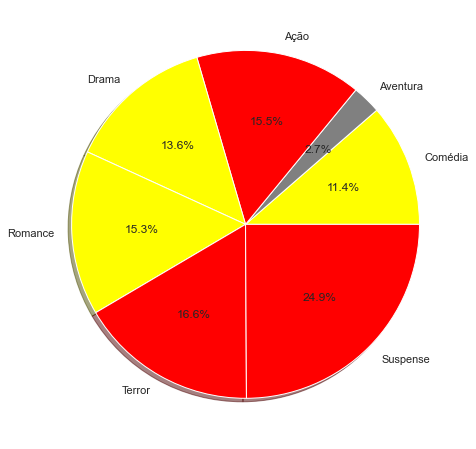

In [31]:
plt.pie(x = 'Espectadores', labels = 'Categoria', data=df, autopct='%1.1f%%', 
        shadow=True, colors = ['yellow','gray','red','yellow','yellow','red','red'])

O motivo pelo qual o gráfico de pizza não ser muito utilizado é evidente, conforme o exemplo acima.
Perceba que, mesmo destacando as categorias de maiores porcentagens, os tamos de cada "pedaço da pizza" são muito parecidos, e não evidenciam graficamente a diferenã na proporção, como por exemplo, Terror e Romance parecem ter tamanho iguais, e, somente quado lemos as porcentagens que percebemos que terror tem mais espectadores que romance.

Um dos nomes mais importantes quando o assunto é visualização de dados, é <i><b> Edward Tufte </i> </b>, considerado o pai da visualização de dados .
Ele nos deixou sua sincera opnião sobre gráficos de pizza (ou <i> pie charts </i> em inglês>) : 


<i>"Uma tabela é geralmente sempre melhor do que um gráfico de pizza "burro"; o único design pior do que um gráfico de pizza são vários deles, pois aí o leitor é convidado a comparar quantidades que estão em confusão espacial tanto dentro como entre os gráficos [...] Dada a sua baixa densidade e falha em ordenar os números em uma dimensão visual, gráficos de pizza nunca deveriam ser usados."</i>
- Tufte, Edward


Então, é mais do que claro que o gráfico de pizza não é recomendo.
Mas se ele se fizer necessário, devemos facilitar a sua visualização o máximo possível
No caso acima, podemos ordenar o gráfico no sentido horário, do menor para  o maior

In [32]:
df = df.sort_values(by = 'Espectadores', ascending = False)

In [33]:
df

Categoria  Espectadores
6  Suspense          1430
5    Terror           953
2      Ação           887
4   Romance           879
3     Drama           783
0   Comédia           654
1  Aventura           153

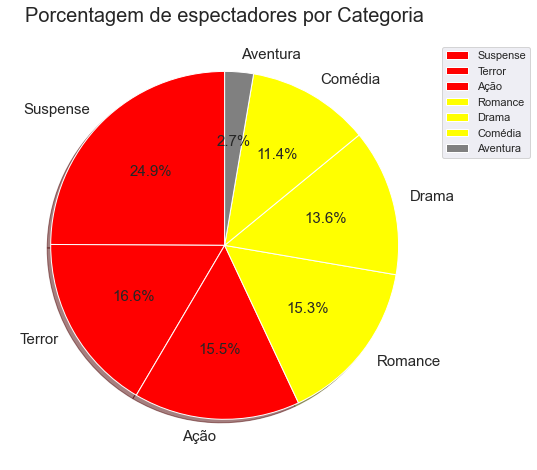

In [34]:
ax = plt.subplot()
ax.pie(x = 'Espectadores', labels = 'Categoria', data=df, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors = ['red','red','red','yellow','yellow','yellow','gray'],
        textprops=dict(size=15)
       )
ax.set_title('Porcentagem de espectadores por Categoria', size=20)
ax.legend(loc=(1,0.7))

Dica : Evite destacar coisas demais, principalmente em um gráfico de pizza, perceba que reduzímos a quantidade de cores para apenas 3, para facilizar a visualização.

Note também que, as cores que são iguais passam a ideia de grupo, e nesse caso, foi proposital, pois quis criar um grupo dos maior valores, dos médios e dos menores.
Isso faz parte do princípio de gestalt, que será abordado mais para a frente

Resumidamente, concluo que o gráfico de pizza consegue se encaixar em algumas situações, e podes sendo utilizado pois é um gráfico muito popular, que apesar de todos os contras, e muito utilizado, e é possível se dizer que no geral, as pessoas gostam desse gráfico, além também de ser um bom gráfico evidenciar quando varios elementos fazem parte de um todo e são estáticos, porém, não é recomendado, entao que gráfico é recomendado ? ("fala o de barras, FALA O DE BARRAS...")
Isso mesmo, é o gráfico de barras.

<BarContainer object of 7 artists>

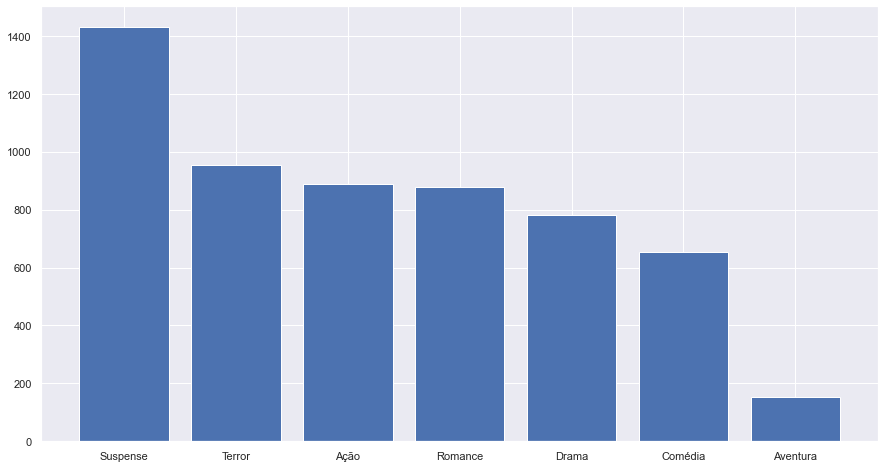

In [35]:
plt.bar(x = 'Categoria', height='Espectadores', data=df)

Perceba que, não aplicamos nada dos demais conceitos que vimos anteriormente tais como, um bom titulo, o destaque das cores, a definição da ideia que queremos passar, legendas e etc... porém, logo de cara, é possível visualizar, a categoria de maior e menor desteque, e, as qu estão no meio-termo.

In [36]:
df['Index'] = [0,1,2,3,4,5,6] 
df.set_index('Index', inplace=True)

#o index havia sido embaralhado por conta do re-agrupamento em ordem decrescente que fizemos anteriormente
#Nesse caso, apenas criei um novo index com os números corretos
#Essa foi a forma que encontrei para re-organizar o index, talvez existam solução mais sofisticadas para tal

Text(0.5, 1.0, 'Número de espectadores por categoria')

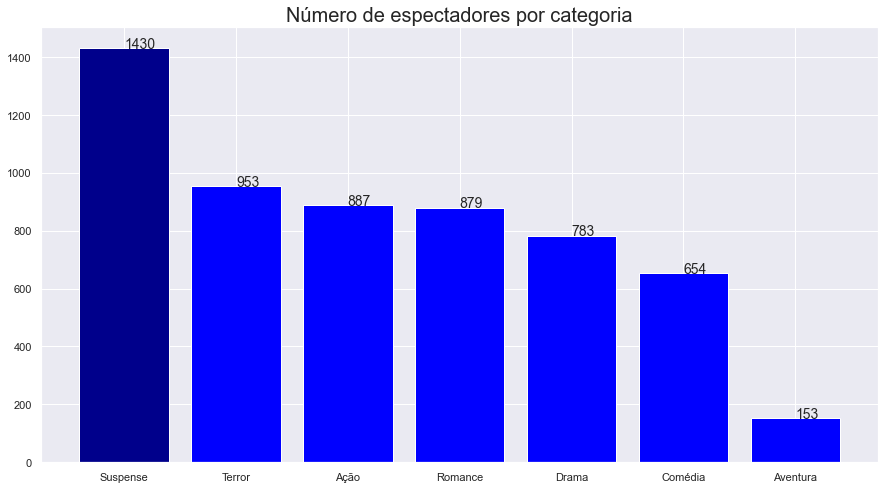

In [37]:
ax = plt.subplot()
ax.bar(x = 'Categoria', height='Espectadores', data=df, color=['darkblue','blue','blue','blue','blue','blue','blue'])

for item, txt in enumerate(df['Espectadores']):
    ax.annotate(txt, (df['Categoria'][item], df['Espectadores'][item]), size = 14)
    
ax.set_title('Número de espectadores por categoria', size=20)

No gráfico acima, apliquei aluns conceitos previamente estudados, com a adição de um novo conceito, o conceito de "unidade'.
Em alguns gráficos anteriores, destacamos o ponto o qual querímos que chamasse a atenção com cores diferentes, porém, no caso acima, fizemos "quase" pois apenas dastacamos com uma tonalidade diferente, mas da mesma cor.
Isso serve para passar a ideia de que todos os elementos são do mesmo conjunto.

# Story telling
## Análise exploratória X Análise explanatória

O <i>strorytelling</i> é o precesso pelo qual se aprende e entende, e, como apresentar as suas análises através da contação de uma história, de forma que possa atrair e ser compreensível ao público.

Esse processo deve ser desolvido antes do desenvolvimento do <i>Data visualization </i>, para que se possa escolher a melhor maneira de apresentar esses dados

-> Definir o público alvo (de forma que faça sentido principalmente para esse público) <br>
-> Como será feita a comunicação <br>
-> Como usar os dados para expôr as ideia

## Os princípios de gestalt 

"A gestalt (guès) (do alemão Gestalt, "forma"), também conhecida como gestaltismo (gues), teoria da forma, psicologia da gestalt, psicologia da boa forma e leis da gestalt, é uma doutrina que defende que, para se compreender as partes, é preciso, antes, compreender o todo. Refere-se a um processo de dar forma, de configurar "o que é colocado diante dos olhos, exposto ao olhar". A palavra gestalt tem o significado "de uma entidade concreta, individual e característica, que existe como algo destacado e que tem uma forma ou configuração como um de seus atributos".[3]"

Wikipédia, a enciclopédia livre, Gestalt, Diponível em: https://pt.wikipedia.org/wiki/Gestalt. ac3sso em: 14 fev. 2022

Os princípios de getalt são: 

Os 7 Princípios de Gestalt <br>

-> Proximidade;<br>
-> Similaridade;<br>
-> Continuidade;<br>
-> Fechamento;<br>
-> Figura-fundo;<br>
-> Região comum;<br>
-> Ponto focal.

In [38]:
index= list(range(0,12))
df = pd.DataFrame(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
                  index = index,
                  columns = ['Mês']
                 )
df['Investimentos - 2020'] = [800,400,1100,400,500,750,1500,650,850,400,1000,720]
df['Investimentos - 2021'] = [400,200,550,200,250,375,750,325,425,200,500,360]
df.head(5)

Mês  Investimentos - 2020  Investimentos - 2021
0  Jan                   800                   400
1  Fev                   400                   200
2  Mar                  1100                   550
3  Abr                   400                   200
4  Mai                   500                   250

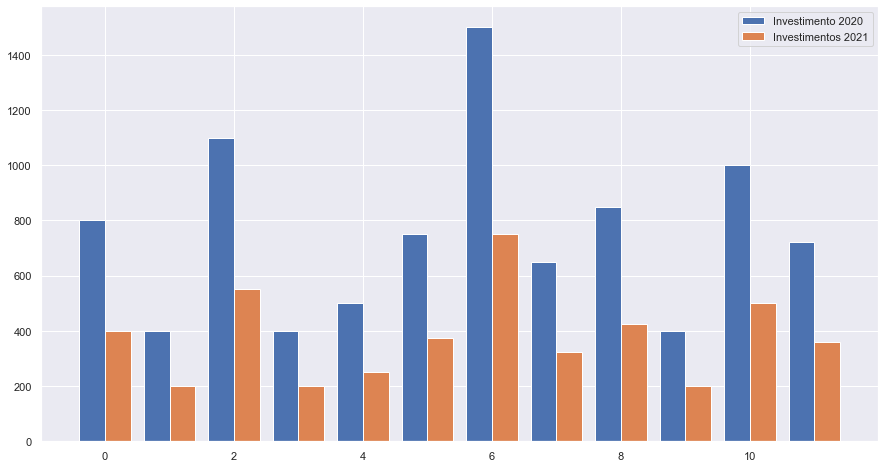

In [39]:
fig, ax = plt.subplots()
x_axis = np.arange(len(df['Mês']))

ax.bar(x_axis - 0.2, height='Investimentos - 2020',  data = df, width=0.4, label='Investimento 2020')
ax.bar(x_axis + 0.2, height='Investimentos - 2021',  data = df, width=0.4, label='Investimentos 2021')

plt.legend()

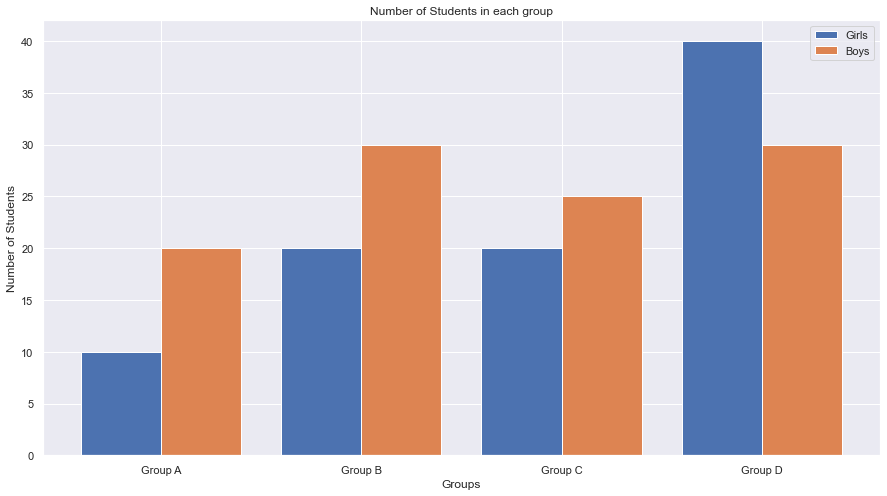

In [40]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()